In [35]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
#Carga de datos
df = pd.read_csv('hotel_bookings.csv')
print(df.shape)
df.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [48]:
# Verificar datos nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
lead_time,119390,0,0.00
is_canceled,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
stays_in_week_nights,119390,0,0.00


In [49]:
#Ver duplicados

# Detectar filas duplicadas
duplicados = df[df.duplicated()]

# Mostrar cantidad de filas duplicadas
cantidad_duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicados}")

Cantidad de filas duplicadas: 31994


In [50]:
#Eliminar duplicados
df.drop_duplicates(inplace=True)
print(df.shape)
df.head()

(87396, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [51]:
# Dado que company tiene una cantidad de casi 95% de valores nulos, se elimina:
df.drop('company', axis=1, inplace=True)
# Debido a que los valores de agent, country y children poseen valores nulos no tan significativos, se reemplazan de la siguiente manera:
df['agent'] = df['agent'].fillna(df['agent'].median())  # Rellenar nulos en 'agent' con mediana
df['country'] = df['country'].fillna('Unknown')  # Rellenar nulos en 'country' con 'Unknown'
df['children'] = df['children'].fillna(0)  # Rellenar nulos en 'children' con 0


In [52]:
#Verificar dataframe de nuevo
#Datos nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
hotel,87396,0,0.0
is_canceled,87396,0,0.0
lead_time,87396,0,0.0
arrival_date_year,87396,0,0.0
arrival_date_month,87396,0,0.0
arrival_date_week_number,87396,0,0.0
arrival_date_day_of_month,87396,0,0.0
stays_in_weekend_nights,87396,0,0.0
stays_in_week_nights,87396,0,0.0
adults,87396,0,0.0


In [53]:
# Verificar cantidad de filas y columnas
print(df.shape)
df.head()

(87396, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [54]:
#Verificar formato
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [57]:
#Cambio de formato object por str y fecha
df['hotel'] = df['hotel'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['children'] = df['children'].astype('int64')
df['meal'] = df['meal'].astype('str')
df['country'] = df['country'].astype('str')
df['market_segment'] = df['market_segment'].astype('str')
df['distribution_channel'] = df['distribution_channel'].astype('str')
df['reserved_room_type'] = df['reserved_room_type'].astype('str')
df['assigned_room_type'] = df['assigned_room_type'].astype('str')
df['deposit_type'] = df['deposit_type'].astype('str')
df['customer_type'] = df['customer_type'].astype('str')
df['reservation_status'] = df['reservation_status'].astype('str')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
#Verificar formato nuevamente
print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [80]:
#Verificación de datos anómalos 1
valores_mayores = df[df['stays_in_week_nights'] > 50]
cantidad_valores_mayores = valores_mayores.shape[0]

print(f"Cantidad de valores mayores que 10 en la columna 'stays_in_week_nights': {cantidad_valores_mayores}")
print(valores_mayores)

Cantidad de valores mayores que 10 en la columna 'stays_in_week_nights': 0
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 31 columns]


In [81]:
#2
valores_mayores_1 = df[df['stays_in_weekend_nights'] > 50]
cantidad_valores_mayores_1 = valores_mayores_1.shape[0]

print(f"Cantidad de valores mayores que 10 en la columna 'stays_in_weekend_nights': {cantidad_valores_mayores_1}")
print(valores_mayores_1)

Cantidad de valores mayores que 10 en la columna 'stays_in_weekend_nights': 0
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 31 columns]


In [90]:
#Verificar ortografía #1
if 'resort Hotel' in df['hotel'].values:
    print("El valor 'resort Hotel' existe en la columna 'hotel'.")
else:
    print("El valor 'resort Hotel' no existe en la columna 'hotel'.")

cantidad_resort_hotel = df[df['hotel'] == 'resort Hotel'].shape[0]
print(f"Cantidad de 'resort Hotel' en la columna 'hotel': {cantidad_resort_hotel}")

El valor 'resort Hotel' no existe en la columna 'hotel'.
Cantidad de 'resort Hotel' en la columna 'hotel': 0


In [91]:
#Verificar ortografía #2
if 'no deposit' in df['deposit_type'].values:
    print("El valor 'no deposit' existe en la columna 'deposit_type'.")
else:
    print("El valor 'no deposit' no existe en la columna 'deposit_type'.")

cantidad_resort_hotel = df[df['deposit_type'] == 'no deposit'].shape[0]
print(f"Cantidad de 'no deposit' en la columna 'deposit_type': {cantidad_resort_hotel}")

El valor 'no deposit' no existe en la columna 'deposit_type'.
Cantidad de 'no deposit' en la columna 'deposit_type': 0


In [94]:
# Estadística descriptiva
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,82.957858,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,108.605400,10.015731,55.013953,0.281533,0.831946,NaN


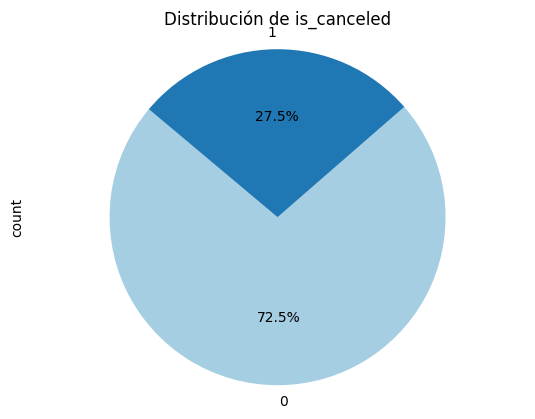

In [101]:
#Visualizaciones univariadas - Gráfico de Torta

df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Distribución de is_canceled')
plt.show()

#En este gráfico se puede visualizar la distribución de la cancelación de reservas. Considerando que 0 significa no cancelado y 1 sí cancelado, se puede ver que la cantidad de no cancelación es mucho mayor con respecto a la cancelación de las reservas, lo cual puede indicar una gran concurrencia al hotel. Aún así, se debería analizar el porqué de las cancelaciones y ver la manera de evitarlas.

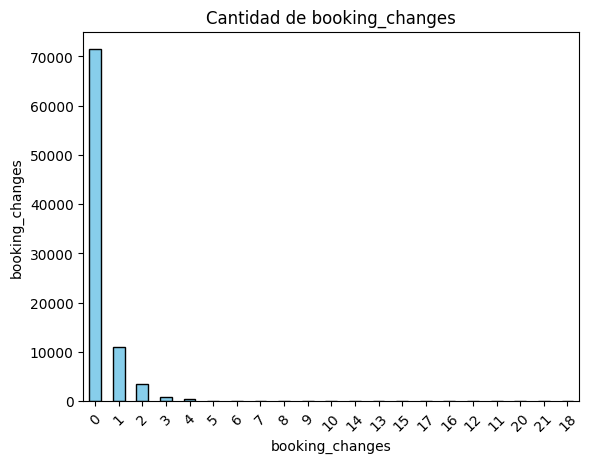

In [102]:
#Visualizaciones univariadas - Gráfico de Barras
df['booking_changes'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('booking_changes')
plt.ylabel('booking_changes')
plt.title('Cantidad de booking_changes')
plt.xticks(rotation=45)
plt.show()

#En este gráfico se puede ver que hay cinco grupos de cambios de reservas: las personas que no realizan cambios en su reserva constituyen el mayor número, superando los 70000, las personas que realizan un cambio en su reserva constituyen alrededor de 10000, las personas con dos cambios son inferiores a la mitad de las personas que realizan 1 cambio en sus reservas. Por último, las personas que realizan de tres a cuatro cambios en sus reservas representan una cantidad muy pequeña en relación a los demás grupos.


In [112]:
# Verificar cantidad de filas y columnas
print(df.shape)
df.head()

(87396, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


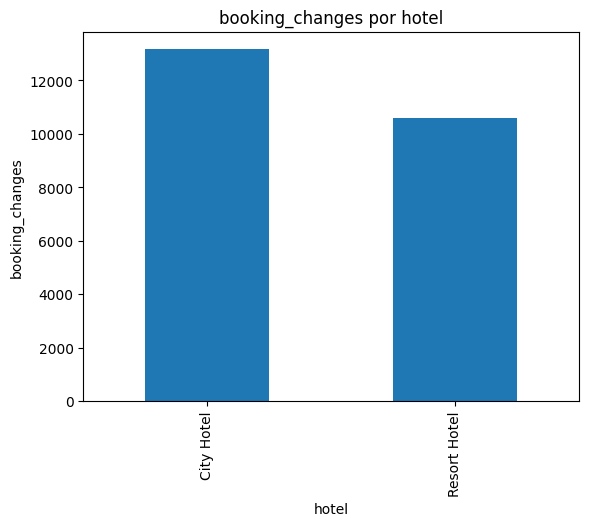

In [123]:
#Visualizaciones multivariadas - Gráfico de Barras

hotel_por_is_canceled = df.groupby('hotel')['booking_changes'].sum()
hotel_por_is_canceled.plot(kind='bar')
plt.xlabel('hotel')
plt.ylabel('booking_changes')
plt.title('booking_changes por hotel')
plt.show()

#En este gráfico se puede visualizar que la mayor parte de los cambios en la reserva se centran en el City Hotel superando los 14mil apróximadamente en contraste a 11mil de Resort Hotel.

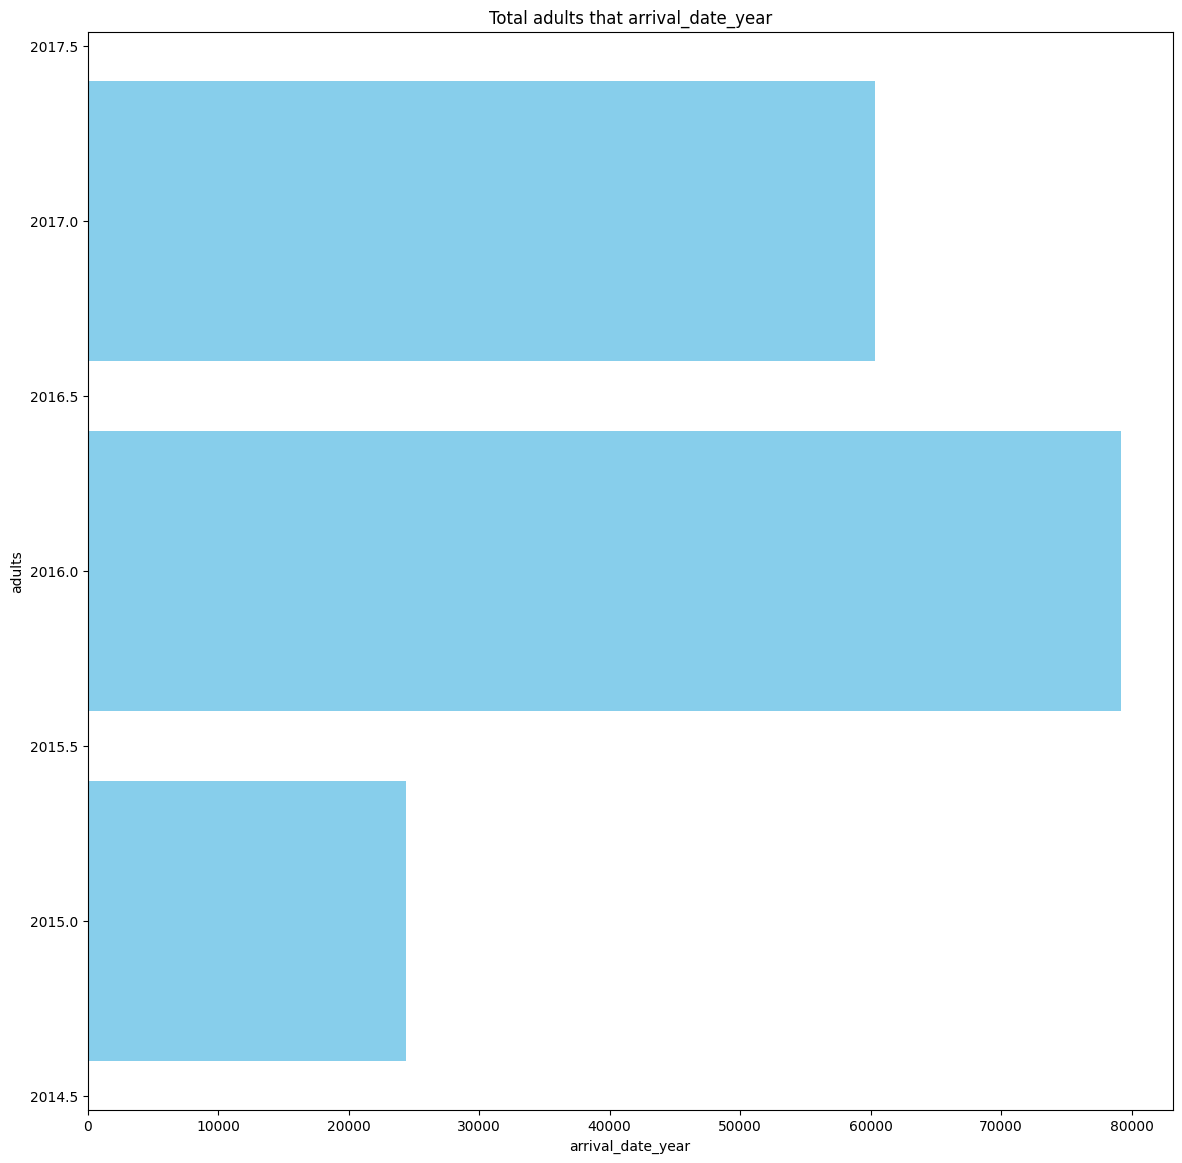

In [126]:
#Visualizaciones multivariadas - Barras Invertidas
adultos_llegada_año = df.groupby('arrival_date_year')['adults'].sum().reset_index()
#Orden por adults
adultos_llegada_año = adultos_llegada_año.sort_values(by='adults', ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(14, 14))
plt.barh(adultos_llegada_año['arrival_date_year'], adultos_llegada_año['adults'], color='skyblue')
plt.xlabel('arrival_date_year')
plt.ylabel('adults')
plt.title('Total adults that arrival_date_year')
plt.show()

#En este gráfico se puede visualizar que la cantidad de adultos que llegaron sigue el siguiente orden: 2016, 2017 y 2015.